In [1]:
# Setting up pandas and other libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 10000)

In [3]:
# Importing csv. This csv documents PPP loans backed by the federal government at the start of the COVID-19 
# pandemic in April. It is absolutely massive, so I'm going to cut it down to get to the data I need.

df = pd.read_csv("PPP_Data_150k_Plus.csv", encoding="utf-8")
df.head(40)

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
0,"d $350,000-1 million",AERO BOX LLC,NaN,NaN,NaN,NaN,484210.0,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN
1,"d $350,000-1 million",BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112.0,NaN,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,75.0,05/03/2020,"Bank of America, National Association",WA-07
2,"d $350,000-1 million",KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407.0,236115.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,21.0,05/03/2020,"Bank of America, National Association",CA-31
3,"d $350,000-1 million","PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420.0,561730.0,Sole Proprietorship,Unanswered,Male Owned,Non-Veteran,NaN,73.0,05/03/2020,Synovus Bank,SC-01
4,"d $350,000-1 million","SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150.0,325510.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,62.0,05/03/2020,Synovus Bank,SC-05
5,"e $150,000-350,000",CHURCH SQUARE PHARMACY INC,NaN,NaN,NaN,NaN,424210.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN
6,"e $150,000-350,000",FERNANDINA BEACH HOTEL GROUP LLC,NaN,NaN,NaN,NaN,721110.0,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN
7,"e $150,000-350,000",FRUIT COVE BAPTIST CHURCH OF JACKSONVILLE FL INC,501 State Road 13,Saint Johns,NaN,32259.0,813110.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,89.0,05/03/2020,Synovus Bank,FL-04
8,"e $150,000-350,000",HUDSON EXTRUSIONS INC.,NaN,NaN,NaN,NaN,326199.0,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN
9,"e $150,000-350,000",MIAMITOWN AUTO PARTS AND RECYCLING INC,NaN,NaN,NaN,NaN,423140.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN


In [4]:
# Establishing that I only want data on California.

df[df["State"] == "CA"]

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
25250,a $5-10 million,"220 LABORATORIES, INC.",2375 Third Street,Riverside,CA,92507.0,325620.0,Subchapter S Corporation,Unanswered,Male Owned,Non-Veteran,NaN,500.0,04/27/2020,Riverview Bank,CA-41
25251,a $5-10 million,A-C ELECTRIC COMPANY,2921 HANGER WAY,BAKERSFIELD,CA,93308.0,238210.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,341.0,04/09/2020,Mission Bank,CA-23
25252,a $5-10 million,A.O. REED & CO,4777 RUFFNER ST,SAN DIEGO,CA,92111.0,238220.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,477.0,04/14/2020,Umpqua Bank,CA-52
25253,a $5-10 million,"AARON THOMAS COMPANY, INC",7421 CHAPMAN AVANUE,GARDEN GROVE,CA,92841.0,561910.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,500.0,04/28/2020,"U.S. Bank, National Association",CA-47
25254,a $5-10 million,"ACCURATE BACKGROUND, LLC",7515 Irvine Center Drive,IRVINE,CA,92618.0,561611.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,500.0,04/11/2020,"Zions Bank, A Division of",CA-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113161,"e $150,000-350,000",ZWZ BEARING USA INC,535 Brea Canyon Road,City of Industry,CA,91789.0,423120.0,Corporation,Asian,Male Owned,Non-Veteran,NaN,22.0,04/09/2020,East West Bank,CA-39
113162,"e $150,000-350,000","ZX GLOBAL INSURANCE SOLUTIONS, INC",10250 CONSTELLATION BLVD STE 100,LOS ANGELES,CA,90067.0,524298.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,21.0,04/29/2020,"Bank of America, National Association",CA-37
113163,"e $150,000-350,000","ZYCADA NETWORKS, INC.","830 Hillview Ct., Suite 280",MILPITAS,CA,95035.0,541511.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,15.0,04/30/2020,Silicon Valley Bank,CA-17
113164,"e $150,000-350,000",ZZM DENTAL MANAGEMENT,201 E. Orangeburg Ave. Ste. C,Modesto,CA,95350.0,621210.0,Subchapter S Corporation,Unanswered,Male Owned,Non-Veteran,NaN,20.0,04/27/2020,California Bank of Commerce,CA-10


In [5]:
# This csv isn't particularly clean, so I'm making sure there's no values where "California" wasn't abbreviated.

df[df["State"] == "California"]

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD


In [6]:
df[df["State"] == "CA"]

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
25250,a $5-10 million,"220 LABORATORIES, INC.",2375 Third Street,Riverside,CA,92507.0,325620.0,Subchapter S Corporation,Unanswered,Male Owned,Non-Veteran,NaN,500.0,04/27/2020,Riverview Bank,CA-41
25251,a $5-10 million,A-C ELECTRIC COMPANY,2921 HANGER WAY,BAKERSFIELD,CA,93308.0,238210.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,341.0,04/09/2020,Mission Bank,CA-23
25252,a $5-10 million,A.O. REED & CO,4777 RUFFNER ST,SAN DIEGO,CA,92111.0,238220.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,477.0,04/14/2020,Umpqua Bank,CA-52
25253,a $5-10 million,"AARON THOMAS COMPANY, INC",7421 CHAPMAN AVANUE,GARDEN GROVE,CA,92841.0,561910.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,500.0,04/28/2020,"U.S. Bank, National Association",CA-47
25254,a $5-10 million,"ACCURATE BACKGROUND, LLC",7515 Irvine Center Drive,IRVINE,CA,92618.0,561611.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,500.0,04/11/2020,"Zions Bank, A Division of",CA-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113161,"e $150,000-350,000",ZWZ BEARING USA INC,535 Brea Canyon Road,City of Industry,CA,91789.0,423120.0,Corporation,Asian,Male Owned,Non-Veteran,NaN,22.0,04/09/2020,East West Bank,CA-39
113162,"e $150,000-350,000","ZX GLOBAL INSURANCE SOLUTIONS, INC",10250 CONSTELLATION BLVD STE 100,LOS ANGELES,CA,90067.0,524298.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,21.0,04/29/2020,"Bank of America, National Association",CA-37
113163,"e $150,000-350,000","ZYCADA NETWORKS, INC.","830 Hillview Ct., Suite 280",MILPITAS,CA,95035.0,541511.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,15.0,04/30/2020,Silicon Valley Bank,CA-17
113164,"e $150,000-350,000",ZZM DENTAL MANAGEMENT,201 E. Orangeburg Ave. Ste. C,Modesto,CA,95350.0,621210.0,Subchapter S Corporation,Unanswered,Male Owned,Non-Veteran,NaN,20.0,04/27/2020,California Bank of Commerce,CA-10


In [7]:
table = pd.DataFrame(df[df["State"] == "CA"])
table

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
25250,a $5-10 million,"220 LABORATORIES, INC.",2375 Third Street,Riverside,CA,92507.0,325620.0,Subchapter S Corporation,Unanswered,Male Owned,Non-Veteran,NaN,500.0,04/27/2020,Riverview Bank,CA-41
25251,a $5-10 million,A-C ELECTRIC COMPANY,2921 HANGER WAY,BAKERSFIELD,CA,93308.0,238210.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,341.0,04/09/2020,Mission Bank,CA-23
25252,a $5-10 million,A.O. REED & CO,4777 RUFFNER ST,SAN DIEGO,CA,92111.0,238220.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,477.0,04/14/2020,Umpqua Bank,CA-52
25253,a $5-10 million,"AARON THOMAS COMPANY, INC",7421 CHAPMAN AVANUE,GARDEN GROVE,CA,92841.0,561910.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,500.0,04/28/2020,"U.S. Bank, National Association",CA-47
25254,a $5-10 million,"ACCURATE BACKGROUND, LLC",7515 Irvine Center Drive,IRVINE,CA,92618.0,561611.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,500.0,04/11/2020,"Zions Bank, A Division of",CA-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113161,"e $150,000-350,000",ZWZ BEARING USA INC,535 Brea Canyon Road,City of Industry,CA,91789.0,423120.0,Corporation,Asian,Male Owned,Non-Veteran,NaN,22.0,04/09/2020,East West Bank,CA-39
113162,"e $150,000-350,000","ZX GLOBAL INSURANCE SOLUTIONS, INC",10250 CONSTELLATION BLVD STE 100,LOS ANGELES,CA,90067.0,524298.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,21.0,04/29/2020,"Bank of America, National Association",CA-37
113163,"e $150,000-350,000","ZYCADA NETWORKS, INC.","830 Hillview Ct., Suite 280",MILPITAS,CA,95035.0,541511.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,15.0,04/30/2020,Silicon Valley Bank,CA-17
113164,"e $150,000-350,000",ZZM DENTAL MANAGEMENT,201 E. Orangeburg Ave. Ste. C,Modesto,CA,95350.0,621210.0,Subchapter S Corporation,Unanswered,Male Owned,Non-Veteran,NaN,20.0,04/27/2020,California Bank of Commerce,CA-10


In [8]:
# Saving the California values in their own csv file.

table.to_csv("PPP_Data_150k_Plus_California.csv", encoding='utf-8')

In [9]:
# First look at the California PPP data.

df = pd.read_csv("PPP_Data_150k_Plus_California.csv", encoding="utf-8")
df.head(40)

,Unnamed: 0,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
0,25250,a $5-10 million,"220 LABORATORIES, INC.",2375 Third Street,Riverside,CA,92507.0,325620.0,Subchapter S Corporation,Unanswered,Male Owned,Non-Veteran,NaN,500.0,04/27/2020,Riverview Bank,CA-41
1,25251,a $5-10 million,A-C ELECTRIC COMPANY,2921 HANGER WAY,BAKERSFIELD,CA,93308.0,238210.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,341.0,04/09/2020,Mission Bank,CA-23
2,25252,a $5-10 million,A.O. REED & CO,4777 RUFFNER ST,SAN DIEGO,CA,92111.0,238220.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,477.0,04/14/2020,Umpqua Bank,CA-52
3,25253,a $5-10 million,"AARON THOMAS COMPANY, INC",7421 CHAPMAN AVANUE,GARDEN GROVE,CA,92841.0,561910.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,500.0,04/28/2020,"U.S. Bank, National Association",CA-47
4,25254,a $5-10 million,"ACCURATE BACKGROUND, LLC",7515 Irvine Center Drive,IRVINE,CA,92618.0,561611.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,500.0,04/11/2020,"Zions Bank, A Division of",CA-45
5,25255,a $5-10 million,"ADVANCED CHEMICAL TRANSPORT, INC., A CALIFORNI...",967 MABURY RD,SAN JOSE,CA,95133.0,562910.0,Subchapter S Corporation,White,Male Owned,Non-Veteran,NaN,407.0,04/10/2020,Comerica Bank,CA-17
6,25256,a $5-10 million,ADVANCED FRESH CONCEPTS FRANCHISE CORP,19205 South Laurel Park Road,Rancho Dominguez,CA,90220.0,722513.0,Corporation,Unanswered,Male Owned,Unanswered,NaN,420.0,04/27/2020,"MUFG Union Bank, National Association",CA-44
7,25257,a $5-10 million,ADVANCED SYSTEMS GROUP,1226 Powell St.,Emeryville,CA,94608.0,423410.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,300.0,04/30/2020,Cache Valley Bank,CA-13
8,25258,a $5-10 million,ADVANTAGE MAILING INC.,1600 N KRAEMER BLVD,ANAHEIM,CA,92806.0,323111.0,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,NaN,372.0,04/27/2020,Cathay Bank,CA-46
9,25259,a $5-10 million,"AGREEYA SOLUTIONS, INC.","605 Coolidge Dr., STE 200",FOLSOM,CA,95630.0,541511.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,397.0,04/16/2020,Bank of the West,CA-07


In [10]:
# Trying to determine what the high end of the LoanRange catagories is. You'll notice on the low end there is no value 
# below $150,000 – that's because this csv file only includes loans larger than that. Smaller loans can be found in 
# a different csv.

df['LoanRange'].unique().tolist()

['a $5-10 million',
 'b $2-5 million',
 'c $1-2 million',
 'd $350,000-1 million',
 'e $150,000-350,000']

In [11]:
# Figuring out how the loan ranges are distributed and saving it to a variable so I can visualize this. Later added 
# in as_index=False so that I could have this as a Pandas dataframe and graph it below.

loanMoney = df.groupby(['LoanRange'], as_index=False).size()
loanMoney

,LoanRange,size
0,a $5-10 million,625
1,b $2-5 million,3156
2,c $1-2 million,7157
3,"d $350,000-1 million",26689
4,"e $150,000-350,000",50289


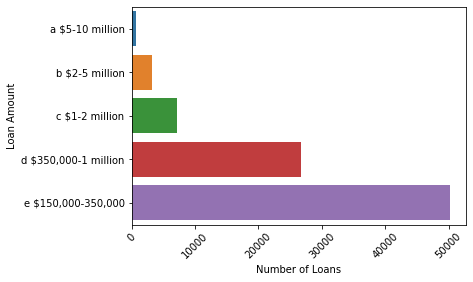

In [19]:
# Now graphing - played with this for a while to try and get the labels to show more clearly and change the x and y 
# axis labels.

myBarplot = sns.barplot(data=loanMoney, y='LoanRange', x='size')
myBarplot.set(xlabel='Number of Loans', ylabel='Loan Amount')
h = plt.xticks(rotation=45)

In [13]:
# Now, I'd like to know how many jobs were saved by each company. I know this will return a long list of results 
# because each company will have a different number of jobs saved with the PPP loans, but I'm looking for the outliers
# – highs and lows. Based on the list returned, looks like 500 was about the max for these companies and some are 
# reporting zero, which is interesting in the context of these loans since they are specifically for employee 
# paycheck protection. Other companies have no value reported ("nan") which is also interesting. These could just be 
# input errors, but I want to know how many of them there are.

df['JobsReported'].unique().tolist()

[500.0,
 341.0,
 477.0,
 407.0,
 420.0,
 300.0,
 372.0,
 397.0,
 nan,
 203.0,
 489.0,
 333.0,
 277.0,
 267.0,
 374.0,
 100.0,
 472.0,
 476.0,
 322.0,
 440.0,
 272.0,
 262.0,
 478.0,
 396.0,
 289.0,
 437.0,
 296.0,
 452.0,
 0.0,
 327.0,
 426.0,
 448.0,
 305.0,
 450.0,
 312.0,
 246.0,
 270.0,
 306.0,
 332.0,
 499.0,
 317.0,
 363.0,
 385.0,
 63.0,
 186.0,
 434.0,
 294.0,
 453.0,
 201.0,
 324.0,
 393.0,
 318.0,
 484.0,
 180.0,
 387.0,
 298.0,
 465.0,
 60.0,
 459.0,
 474.0,
 366.0,
 390.0,
 295.0,
 250.0,
 492.0,
 480.0,
 439.0,
 464.0,
 475.0,
 377.0,
 238.0,
 315.0,
 208.0,
 345.0,
 494.0,
 395.0,
 381.0,
 216.0,
 249.0,
 133.0,
 346.0,
 360.0,
 463.0,
 140.0,
 498.0,
 495.0,
 320.0,
 334.0,
 401.0,
 163.0,
 233.0,
 410.0,
 314.0,
 240.0,
 490.0,
 447.0,
 362.0,
 237.0,
 160.0,
 355.0,
 469.0,
 110.0,
 367.0,
 417.0,
 380.0,
 348.0,
 425.0,
 344.0,
 460.0,
 340.0,
 338.0,
 354.0,
 443.0,
 297.0,
 458.0,
 421.0,
 473.0,
 487.0,
 156.0,
 351.0,
 113.0,
 399.0,
 442.0,
 485.0,
 205.0,
 221.0

In [14]:
# In an effort to see how many there are, I used .value_counts(). Unfortunately the returned result truncated the 
# list, so with a little help from Google I added option_context to fix that. And now, I can see that 4,830 companies 
# that received loans purportedly saved zero jobs - so that's a large number! It could be an input error, or it could
# be that they put down nothing or the number zero in their applications.

with pd.option_context('display.max_rows', 1000):
    print (df['JobsReported'].value_counts())

0.0      4830
15.0     2300
20.0     2292
14.0     2047
12.0     2024
18.0     1921
16.0     1871
25.0     1868
17.0     1850
13.0     1849
10.0     1839
19.0     1678
11.0     1623
22.0     1621
30.0     1618
24.0     1517
21.0     1507
23.0     1469
35.0     1317
28.0     1222
26.0     1202
9.0      1184
27.0     1155
40.0     1123
32.0     1114
8.0      1020
31.0      979
29.0      976
45.0      964
33.0      877
34.0      857
38.0      853
36.0      807
50.0      805
42.0      704
37.0      701
48.0      683
43.0      667
7.0       652
39.0      648
44.0      606
41.0      586
49.0      579
47.0      576
46.0      552
60.0      502
55.0      454
65.0      443
6.0       433
52.0      412
51.0      372
53.0      353
70.0      353
54.0      349
56.0      342
5.0       342
75.0      335
500.0     317
80.0      316
58.0      315
57.0      311
59.0      273
100.0     271
68.0      267
62.0      265
67.0      254
61.0      253
63.0      252
64.0      237
90.0      232
66.0      224
85.0  

In [27]:
# I wonder if there are any areas that might have a disproportionately high number of businesses that reported zero 
# jobs saved. I'll use congressional districts since those are noted in the spreadsheet.


df[df["JobsReported"] == 0.0].groupby('CD',as_index=False).size().sort_values('size', ascending=False)

,CD,size
11,CA-12,293
51,CA-52,210
52,CA-53,176
48,CA-49,172
44,CA-45,168
32,CA-33,166
16,CA-17,158
13,CA-14,154
27,CA-28,129
17,CA-18,129


In [28]:
#CA-12, which encompasses San Francisco, has the highest number. That's interesting because while it is one of the 
# larger congressional districts in the state it is not the largest. In the Bay Aream, CA-17 and CA-9 have a higher 
# population, as do some of the districts in Southern California. I'm going to get a list of the businesses in CA-12 
# that indicated they had saved zero jobs and use this as a basis for a possible story. 

df[(df["JobsReported"] == 0.0)&(df["CD"] == 'CA-12')]

,Unnamed: 0,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
202,25452,a $5-10 million,GDM HOTEL PROPERTIES LLC,909 Montgomery St Ste 400,San Francisco,CA,94133.0,721110.0,Limited Liability Company(LLC),Unanswered,Unanswered,Non-Veteran,NaN,0.0,04/28/2020,First Republic Bank,CA-12
626,25876,b $2-5 million,15FIVE INC,3053 FILLMORE ST #279,SAN FRANCISCO,CA,94123.0,511210.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,0.0,08/06/2020,Coastal Community Bank,CA-12
760,26010,b $2-5 million,AMERICAN CONSERVATORY THEATRE FOUNDATION,30 GRANT AVE 7TH FL,SAN FRANCISCO,CA,94108.0,711110.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,0.0,04/28/2020,Signature Bank,CA-12
1580,26830,b $2-5 million,FICTIV INC.,168 Welsh St A,San Francisco,CA,94107.0,541511.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,0.0,04/15/2020,Silicon Valley Bank,CA-12
1852,27102,b $2-5 million,HOMEBRIDGE INC,1035 MARKET ST L-1,SAN FRANCISCO,CA,94103.0,621610.0,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,0.0,07/21/2020,"Wells Fargo Bank, National Association",CA-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84831,110081,"e $150,000-350,000","URBAN MASSAGE, LLC",785 Mission Street,San Francisco,CA,94103.0,812199.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,0.0,04/30/2020,Cross River Bank,CA-12
84856,110106,"e $150,000-350,000",URGENT ROOTER AND PLUMBING INC,135 DARIEN WAY,SAN FRANCISCO,CA,94127.0,238220.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,0.0,05/14/2020,"Wells Fargo Bank, National Association",CA-12
86250,111500,"e $150,000-350,000",WDOM ENTERPRISES LLC,4124 18TH STREET,SAN FRANCISCO,CA,94114.0,561499.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,0.0,05/04/2020,"Wells Fargo Bank, National Association",CA-12
87550,112800,"e $150,000-350,000",YANG DDS INC,2482 MISSION ST,SAN FRANCISCO,CA,94110.0,621210.0,Corporation,Unanswered,Male Owned,Non-Veteran,NaN,0.0,04/30/2020,"Wells Fargo Bank, National Association",CA-12
